In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sb

In [47]:
data = pd.read_csv('/content/video_game_sales_dataset.csv')
data.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,Global_Sales,Critic_Score,User_Score
0,Game H A0,PS4,2019,RPG,Nintendo,2.88,7.87,85,9.9
1,Game C B1,PC,2017,Shooter,Valve,1.35,1.99,96,8.6
2,Game D C2,PS4,2016,Action,EA,4.36,7.78,87,9.2
3,Game A D3,PS4,2017,Action,EA,3.31,4.10,90,8.2
4,Game A E4,PS4,2017,Action,EA,3.93,6.56,80,8.8


In [48]:
data.isnull().sum()

,0
Name,0
Platform,0
Year,0
Genre,0
Publisher,0
NA_Sales,0
Global_Sales,0
Critic_Score,0
User_Score,0


In [49]:
x = data.iloc[:, [6,7]].values
print(x)

[[ 7.87 85.  ]
 [ 1.99 96.  ]
 [ 7.78 87.  ]
 [ 4.1  90.  ]
 [ 6.56 80.  ]
 [ 9.88 87.  ]
 [ 9.53 84.  ]
 [ 5.55 82.  ]
 [ 5.27 76.  ]
 [ 5.16 82.  ]
 [ 9.8  90.  ]
 [ 6.87 88.  ]
 [ 7.42 90.  ]
 [ 8.43 90.  ]
 [ 5.35 83.  ]
 [ 6.79 94.  ]
 [ 7.53 89.  ]
 [ 6.33 83.  ]
 [ 8.07 92.  ]
 [ 2.01 85.  ]
 [ 5.89 87.  ]
 [ 8.55 91.  ]
 [ 5.29 81.  ]
 [ 5.05 86.  ]
 [ 7.82 94.  ]
 [ 3.18 94.  ]
 [ 5.01 83.  ]
 [ 3.98 75.  ]
 [ 4.8  85.  ]
 [ 8.24 95.  ]
 [ 4.32 84.  ]
 [ 6.13 85.  ]
 [ 6.55 94.  ]
 [ 8.02 92.  ]
 [ 5.25 87.  ]
 [ 4.1  89.  ]
 [ 3.84 80.  ]
 [ 5.91 93.  ]
 [ 7.53 89.  ]
 [ 4.78 82.  ]
 [ 7.45 89.  ]
 [ 7.5  93.  ]
 [ 8.77 86.  ]
 [ 7.62 87.  ]
 [ 5.17 81.  ]
 [ 7.45 81.  ]
 [ 6.17 85.  ]
 [ 3.39 93.  ]
 [ 3.66 81.  ]
 [ 7.62 90.  ]
 [ 2.46 86.  ]
 [ 3.73 84.  ]
 [ 8.   94.  ]
 [ 2.98 89.  ]
 [ 2.65 86.  ]
 [ 5.88 86.  ]
 [ 2.76 82.  ]
 [ 7.42 94.  ]
 [ 6.16 86.  ]
 [ 3.88 85.  ]
 [ 3.14 89.  ]
 [ 5.6  93.  ]
 [ 2.03 72.  ]
 [ 7.75 86.  ]
 [ 6.58 91.  ]
 [ 7.67 86.  ]
 [ 6.29 85

In [50]:
s =[]
for i in range(1,11):
  km = KMeans(n_clusters = i,init ='k-means++',random_state=42)
  km.fit(x)
  s.append(km.inertia_)

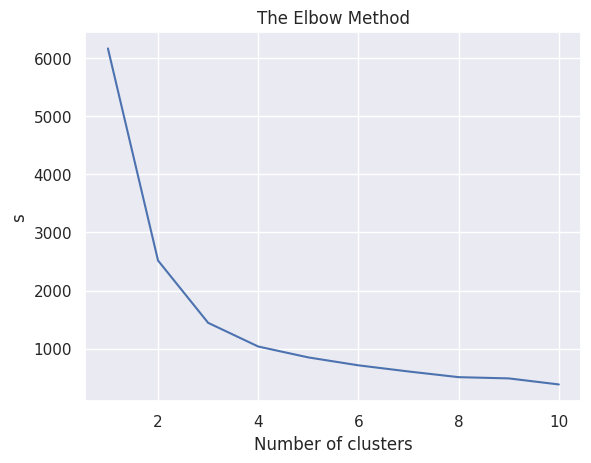

In [51]:
sb.set()
plt.plot(range(1,11),s)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('s')
plt.show()

In [52]:
kmeans = KMeans(n_clusters = 3,init ='k-means++',random_state=42)
y_kmeans = kmeans.fit_predict(x)
print(y_kmeans)

[0 1 0 1 0 0 0 0 2 0 1 1 1 1 0 1 1 0 1 0 0 1 0 0 1 1 0 2 0 1 0 0 1 1 0 1 0
 1 1 0 1 1 0 0 0 0 0 1 0 1 0 0 1 1 0 0 0 1 0 0 1 1 2 0 1 0 0 0 0 0 2 0 0 0
 2 2 0 2 2 0 1 1 1 2 2 1 0 1 1 0 2 0 2 0 1 1 0 2 0 0 0 2 2 2 1 0 0 0 1 0 2
 0 0 0 0 2 1 1 1 1 1 1 1 2 2 0 2 1 1 1 0 1 0 1 0 1 0 1 1 1 1 2 1 0 0 1 0 0
 0 2]


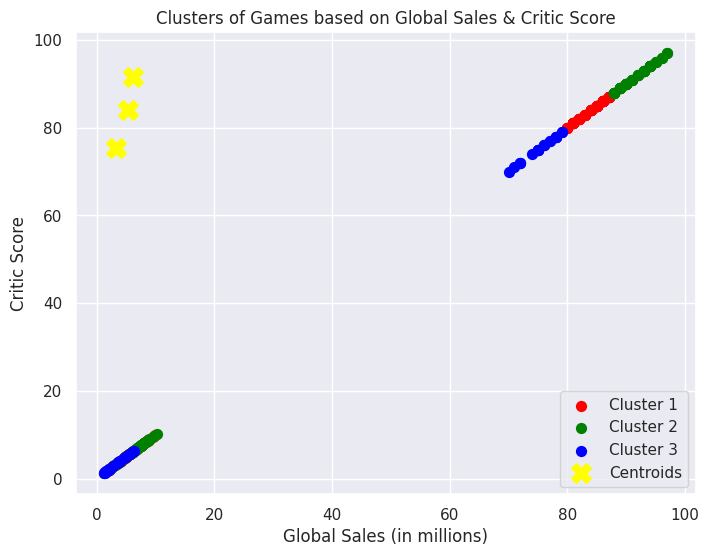

In [56]:
plt.figure(figsize=(8, 6))
plt.scatter(x[y_kmeans == 0], x[y_kmeans == 0], s=50, c='red', label='Cluster 1')
plt.scatter(x[y_kmeans == 1], x[y_kmeans == 1], s=50, c='green', label='Cluster 2')
plt.scatter(x[y_kmeans == 2], x[y_kmeans == 2], s=50, c='blue', label='Cluster 3')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='yellow', label='Centroids', marker='X')
plt.title('Clusters of Games based on Global Sales & Critic Score')
plt.xlabel('Global Sales (in millions)')
plt.ylabel('Critic Score')
plt.legend()
plt.grid(True)
plt.show()
